In [126]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
sns.set()
%matplotlib inline
warnings.filterwarnings('ignore')

In [127]:
# import dataset

df = pd.read_csv("AirBNB.csv")

In [128]:
df.head(25)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
5,12422935,Private room,2.0,1.0,strict,True,t,100.0,1.0,1.0,4.442651
6,11825529,Entire home/apt,3.0,1.0,moderate,True,t,97.0,1.0,1.0,4.418841
7,13971273,Entire home/apt,2.0,1.0,moderate,True,f,93.0,1.0,1.0,4.787492
8,180792,Private room,2.0,1.0,moderate,True,f,99.0,1.0,1.0,4.787492
9,5385260,Private room,2.0,1.0,moderate,True,t,90.0,1.0,1.0,3.583519


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
id                      74111 non-null int64
room_type               74106 non-null object
accommodates            74108 non-null float64
bathrooms               73908 non-null float64
cancellation_policy     74103 non-null object
cleaning_fee            74107 non-null object
instant_bookable        74111 non-null object
review_scores_rating    57389 non-null float64
bedrooms                74019 non-null float64
beds                    73980 non-null float64
log_price               74111 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [130]:
df.describe()

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,7.411100e+04,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,1.126662e+07,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,6.081735e+06,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,3.440000e+02,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,1.225415e+07,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,1.640226e+07,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,2.123090e+07,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


In [131]:
df.nunique()

id                      74111
room_type                   3
accommodates               16
bathrooms                  17
cancellation_policy         3
cleaning_fee                2
instant_bookable            2
review_scores_rating       54
bedrooms                   11
beds                       18
log_price                 767
dtype: int64

In [132]:
# Data Preprocessing

# removing unwanted cols

df.drop("id",axis = 1, inplace = True)

In [133]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [134]:
df['cleaning_fee'].value_counts()

True     54399
False    19708
Name: cleaning_fee, dtype: int64

In [135]:
# check missing value in each col


for i in df.columns:
    # this will check only for nan value
    print(f"{i} have {df[i].isnull().sum()} or {round((df[i].isnull().sum()/74111)*100,5)} % NAN value") # it check for nan value
    
    print(f"No. of empty cell in {i} is:",(df[i]== '').sum()) # it check for empty strings
    print()




room_type have 5 or 0.00675 % NAN value
No. of empty cell in room_type is: 0

accommodates have 3 or 0.00405 % NAN value
No. of empty cell in accommodates is: 0

bathrooms have 203 or 0.27391 % NAN value
No. of empty cell in bathrooms is: 0

cancellation_policy have 8 or 0.01079 % NAN value
No. of empty cell in cancellation_policy is: 0

cleaning_fee have 4 or 0.0054 % NAN value
No. of empty cell in cleaning_fee is: 0

instant_bookable have 0 or 0.0 % NAN value
No. of empty cell in instant_bookable is: 0

review_scores_rating have 16722 or 22.56345 % NAN value
No. of empty cell in review_scores_rating is: 0

bedrooms have 92 or 0.12414 % NAN value
No. of empty cell in bedrooms is: 0

beds have 131 or 0.17676 % NAN value
No. of empty cell in beds is: 0

log_price have 0 or 0.0 % NAN value
No. of empty cell in log_price is: 0



In [136]:
df['accommodates'].dtype

dtype('float64')

In [137]:
df['cleaning_fee'].dtype

dtype('O')

In [138]:
df['accommodates'].median()

2.0

In [139]:
df['cancellation_policy'].dtype


dtype('O')

In [140]:
df['cancellation_policy'].value_counts()

strict      32500
flexible    22543
moderate    19060
Name: cancellation_policy, dtype: int64

In [141]:
df['cancellation_policy'].value_counts().index[0] # mode

'strict'

In [142]:
# Missing Value Treatment

# for numeric value :median 
# for catg value : mode

for i in df.columns:
    if df[i].dtype == 'O' or df[i].dtype == 'bool':
        df[i].fillna(df[i].value_counts().index[0],inplace=True)
    else:
        df[i].fillna(df[i].median(),inplace = True)
        



In [143]:
# check missing value in each col


for i in df.columns:
    # this will check only for nan value
    print(f"{i} have {df[i].isnull().sum()} or {round((df[i].isnull().sum()/74111)*100,5)} % NAN value") # it check for nan value
    
    print(f"No. of empty cell in {i} is:",(df[i]== '').sum()) # it check for empty strings
    print()




room_type have 0 or 0.0 % NAN value
No. of empty cell in room_type is: 0

accommodates have 0 or 0.0 % NAN value
No. of empty cell in accommodates is: 0

bathrooms have 0 or 0.0 % NAN value
No. of empty cell in bathrooms is: 0

cancellation_policy have 0 or 0.0 % NAN value
No. of empty cell in cancellation_policy is: 0

cleaning_fee have 0 or 0.0 % NAN value
No. of empty cell in cleaning_fee is: 0

instant_bookable have 0 or 0.0 % NAN value
No. of empty cell in instant_bookable is: 0

review_scores_rating have 0 or 0.0 % NAN value
No. of empty cell in review_scores_rating is: 0

bedrooms have 0 or 0.0 % NAN value
No. of empty cell in bedrooms is: 0

beds have 0 or 0.0 % NAN value
No. of empty cell in beds is: 0

log_price have 0 or 0.0 % NAN value
No. of empty cell in log_price is: 0



In [144]:
# checking for Duplicate Records

In [145]:
df.duplicated().sum()

21144

In [146]:
df.drop_duplicates(inplace = True)

In [147]:
# always reset index 
# bczz when we remove the dupilcated rows our index value also get removed and it creates gaps bw indeces

df.reset_index(drop=True, inplace=True) # drop is true to drop the current index and replace with new

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52967 entries, 0 to 52966
Data columns (total 10 columns):
room_type               52967 non-null object
accommodates            52967 non-null float64
bathrooms               52967 non-null float64
cancellation_policy     52967 non-null object
cleaning_fee            52967 non-null bool
instant_bookable        52967 non-null object
review_scores_rating    52967 non-null float64
bedrooms                52967 non-null float64
beds                    52967 non-null float64
log_price               52967 non-null float64
dtypes: bool(1), float64(6), object(3)
memory usage: 3.7+ MB


In [149]:
# Encoding

In [151]:
df.head(25)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,96.0,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
5,Private room,2.0,1.0,strict,True,t,100.0,1.0,1.0,4.442651
6,Entire home/apt,3.0,1.0,moderate,True,t,97.0,1.0,1.0,4.418841
7,Entire home/apt,2.0,1.0,moderate,True,f,93.0,1.0,1.0,4.787492
8,Private room,2.0,1.0,moderate,True,f,99.0,1.0,1.0,4.787492
9,Private room,2.0,1.0,moderate,True,t,90.0,1.0,1.0,3.583519


In [155]:
df['room_type'].nunique() 

3

In [159]:
from sklearn.preprocessing import LabelEncoder
col=[]
for i in df.columns:
    if df[i].dtype == 'O' or df[i].dtype == 'bool':
        if df[i].nunique() <3: # for bool
            label = LabelEncoder()
            df[i] = label.fit_transform(df[i])
        if df[i].nunique() > 2: # dummy
            col.append(i)
df = pd.get_dummies(df, columns= col)
            
            

In [160]:
df

,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,3.0,1.0,1,0,100.0,1.0,1.0,5.010635,1,0,0,0,0,1
1,7.0,1.0,1,1,93.0,3.0,3.0,5.129899,1,0,0,0,0,1
2,5.0,1.0,1,1,92.0,1.0,3.0,4.976734,1,0,0,0,1,0
3,4.0,1.0,1,0,96.0,2.0,2.0,6.620073,1,0,0,1,0,0
4,2.0,1.0,1,1,40.0,0.0,1.0,4.744932,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52962,2.0,1.0,1,0,100.0,1.0,1.0,4.356709,1,0,0,0,0,1
52963,4.0,2.0,1,0,93.0,2.0,4.0,5.043425,1,0,0,0,1,0
52964,5.0,1.0,1,1,94.0,2.0,2.0,5.220356,1,0,0,0,1,0
52965,2.0,1.0,1,1,96.0,0.0,2.0,5.273000,1,0,0,0,0,1


In [164]:
df.drop(['room_type_Shared room','cancellation_policy_strict'], axis = 1, inplace = True) # to avoid multicolinearity

In [165]:
df

,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,cancellation_policy_flexible,cancellation_policy_moderate
0,3.0,1.0,1,0,100.0,1.0,1.0,5.010635,1,0,0,0
1,7.0,1.0,1,1,93.0,3.0,3.0,5.129899,1,0,0,0
2,5.0,1.0,1,1,92.0,1.0,3.0,4.976734,1,0,0,1
3,4.0,1.0,1,0,96.0,2.0,2.0,6.620073,1,0,1,0
4,2.0,1.0,1,1,40.0,0.0,1.0,4.744932,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
52962,2.0,1.0,1,0,100.0,1.0,1.0,4.356709,1,0,0,0
52963,4.0,2.0,1,0,93.0,2.0,4.0,5.043425,1,0,0,1
52964,5.0,1.0,1,1,94.0,2.0,2.0,5.220356,1,0,0,1
52965,2.0,1.0,1,1,96.0,0.0,2.0,5.273000,1,0,0,0


In [181]:
# splitting dependent and independent variable
y = df.pop('log_price')
x = df


In [182]:
x

,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Entire home/apt,room_type_Private room,cancellation_policy_flexible,cancellation_policy_moderate
0,3.0,1.0,1,0,100.0,1.0,1.0,1,0,0,0
1,7.0,1.0,1,1,93.0,3.0,3.0,1,0,0,0
2,5.0,1.0,1,1,92.0,1.0,3.0,1,0,0,1
3,4.0,1.0,1,0,96.0,2.0,2.0,1,0,1,0
4,2.0,1.0,1,1,40.0,0.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
52962,2.0,1.0,1,0,100.0,1.0,1.0,1,0,0,0
52963,4.0,2.0,1,0,93.0,2.0,4.0,1,0,0,1
52964,5.0,1.0,1,1,94.0,2.0,2.0,1,0,0,1
52965,2.0,1.0,1,1,96.0,0.0,2.0,1,0,0,0


In [183]:
y

0        5.010635
1        5.129899
2        4.976734
3        6.620073
4        4.744932
           ...   
52962    4.356709
52963    5.043425
52964    5.220356
52965    5.273000
52966    4.852030
Name: log_price, Length: 52967, dtype: float64

In [ ]:
# Outlier Detection

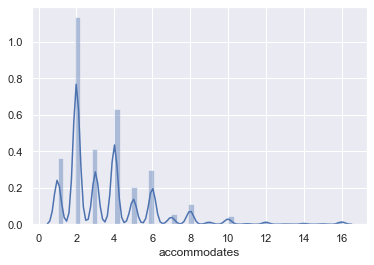

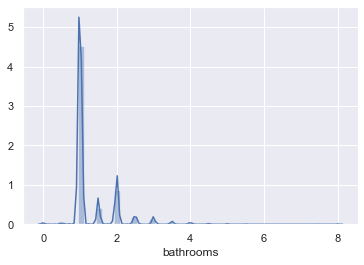

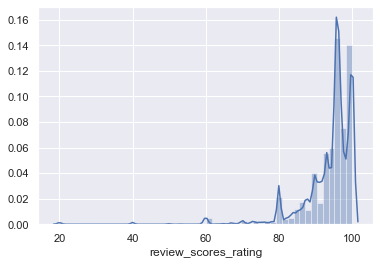

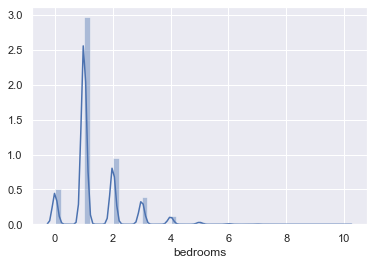

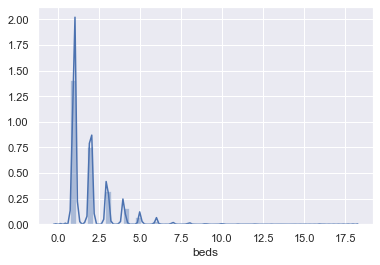

In [195]:
for i in x:
    if x[i].dtype =='float64':
        sns.distplot(x[i])
        plt.show()

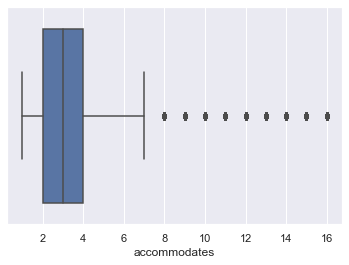

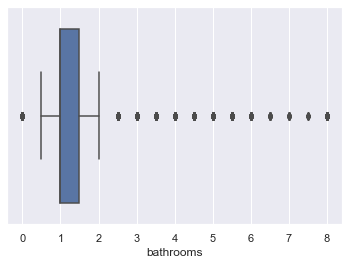

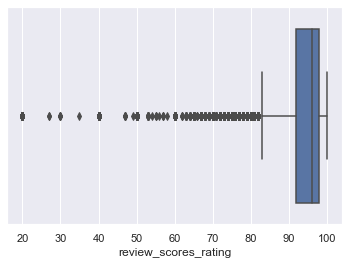

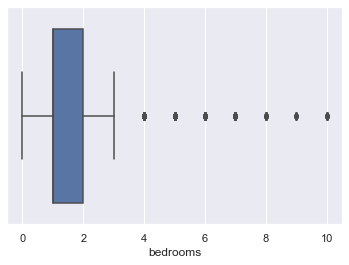

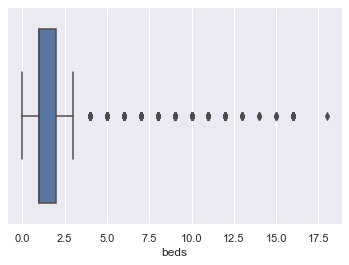

In [196]:
for i in x:
    if x[i].dtype =='float64':
        sns.boxplot(x[i])
        plt.show()

In [ ]:
# since all are squed distribution we will go with iqr method and capping approch

In [200]:
for i in x:
    if x[i].dtype =='float64':
        iqr = x[i].quantile(0.75)- x[i].quantile(0.25)
        LL = x[i].quantile(0.25) - 1.5*iqr
        UL = x[i].quantile(0.75)+1.5 *iqr
        
        # capping
        x[i] = np.where(x[i] > UL,UL, np.where(x[i] <LL,LL,x[i] )) 

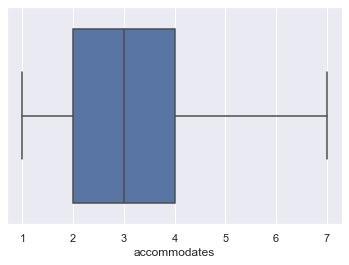

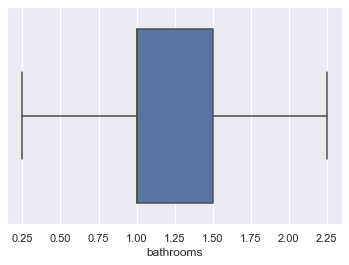

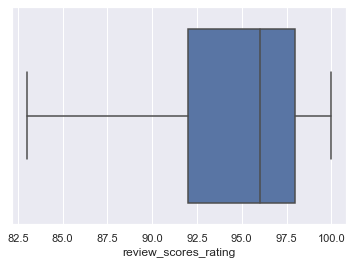

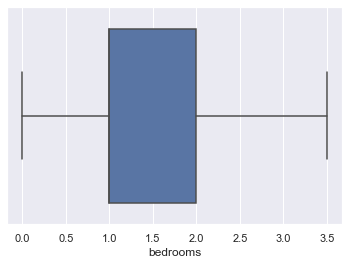

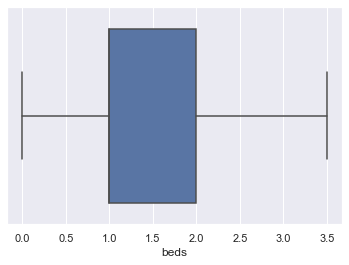

In [201]:
for i in x:
    if x[i].dtype =='float64':
        sns.boxplot(x[i])
        plt.show()